In [72]:
import pandas as pd 
import time
import numpy as np 
import time
import re
import string
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import nltk
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import math
import re
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import ast
from deep_translator import GoogleTranslator, PonsTranslator

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets


[nltk_data] Downloading package punkt to /home/mrojasta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/mrojasta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/mrojasta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/mrojasta/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
training_df = pd.read_excel('training_data.xlsx')
test_df = pd.read_excel('test_data.xlsx')

In [5]:
#Section A 

#a
training_df_1 = training_df
test_df_1 = test_df

#handling weird encoding in the tweets text under the column "full_text"
training_df_1['full_text'] = training_df_1['full_text'].apply(ast.literal_eval).str.decode("utf-8")
test_df_1['full_text'] = test_df_1['full_text'].apply(ast.literal_eval).str.decode("utf-8")

#Removing "RT" from each tweet
training_df_1['full_text'] = training_df_1['full_text'].str.replace('RT ','', regex=True) 
test_df_1['full_text'] = test_df_1['full_text'].str.replace('RT ','', regex=True) 
table_1 = pd.DataFrame() 

#eliminating the mention usernames in the tweets so I can count the words and characters of the tweets more accurately 
pattern = r'@\w+'  # This pattern matches Twitter usernames starting with '@'
training_df_1['full_text'] = training_df_1['full_text'].apply(lambda x: re.sub(pattern, '', x))
test_df_1['full_text'] = test_df_1['full_text'].apply(lambda x: re.sub(pattern, '', x))


#Getting the length in #characters and #words of the tweets
table_1['tweet length (characters)'] = training_df_1['full_text'].str.len()
table_1['tweet length (words)'] = training_df_1['full_text'].str.split().str.len()

#Getting the length in #characters and #words of the hashtag
table_1['hashtag length (characters)'] = training_df_1['hashtags'].str.len()
table_1['hashtag length (words)'] = training_df_1['hashtags'].str.split().str.len()

#table_1.head()

#making the table that contains information on min, average, median and max of the table_1
summary_stats = pd.DataFrame({
    'Minimum': table_1.min(),
    'Average': table_1.mean(),
    'Median': table_1.median(),
    'Maximum': table_1.max()
})

# Displaying the summary statistics DataFrame
print(summary_stats)

                             Minimum     Average  Median  Maximum
tweet length (characters)        0.0  124.936755   121.0    335.0
tweet length (words)             0.0   19.157022    18.0     76.0
hashtag length (characters)      1.0   14.089948    11.0    145.0
hashtag length (words)           1.0    1.577724     1.0     16.0


In [6]:
pip install ratelimit

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


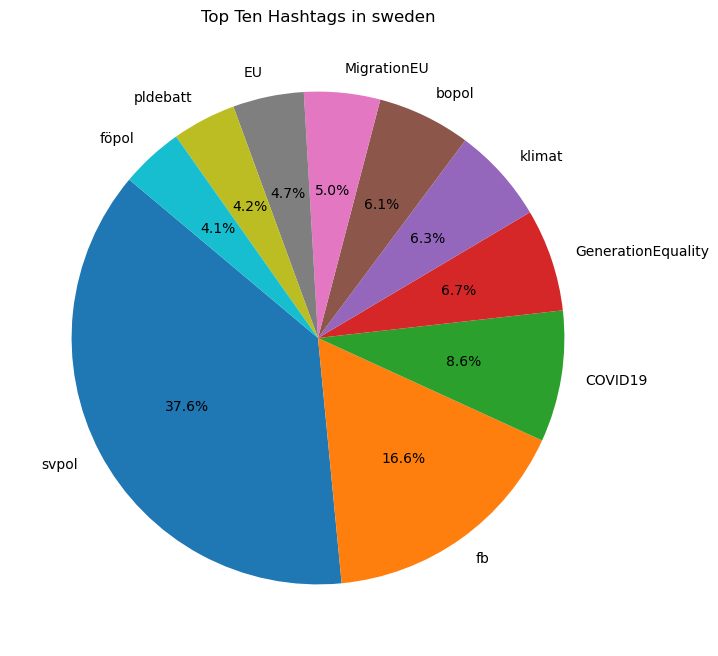

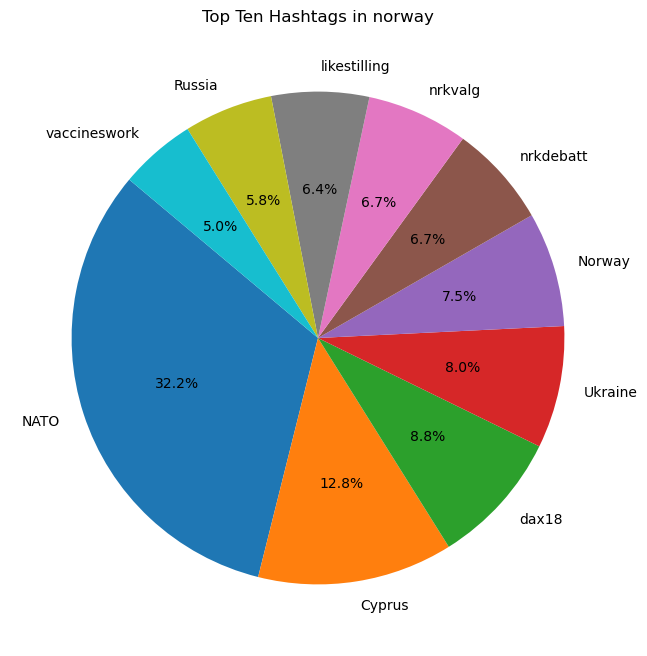

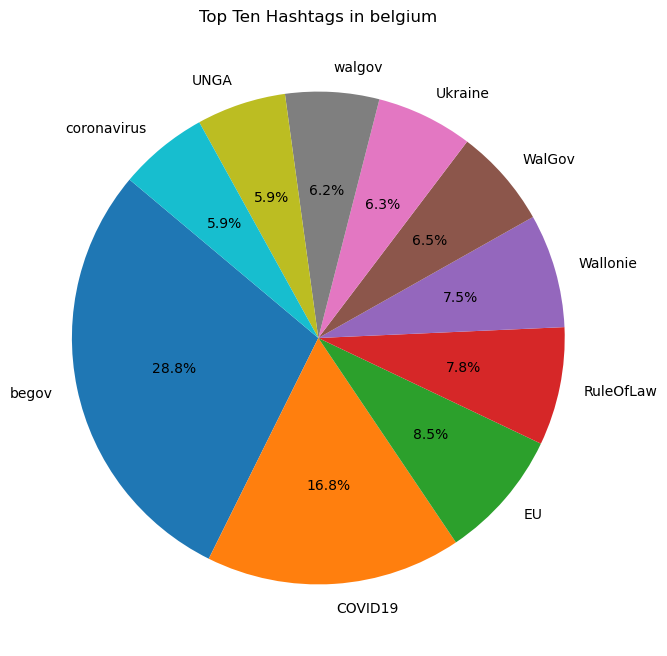

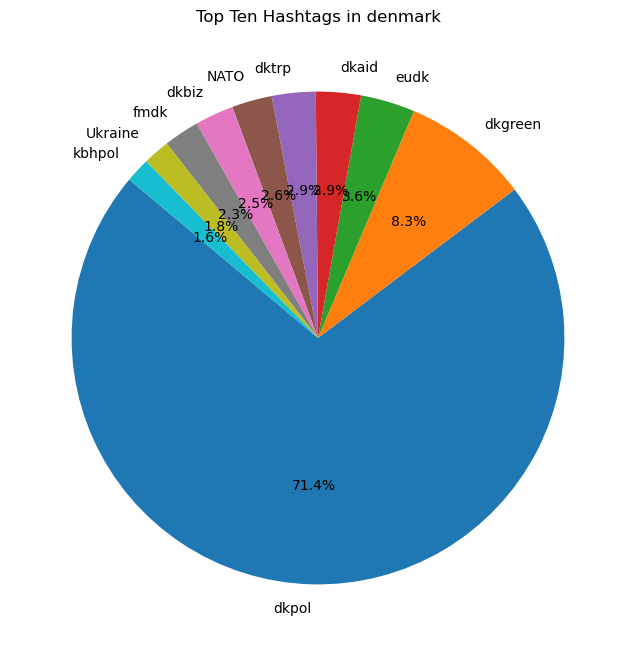

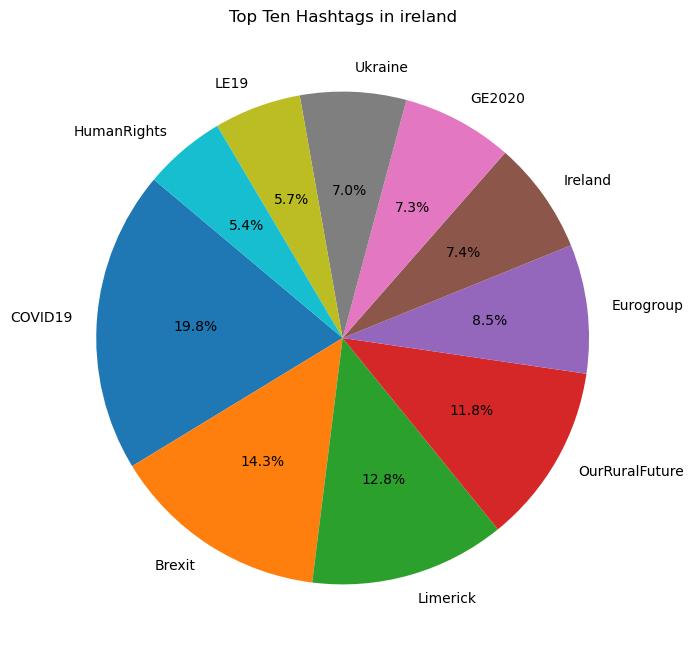

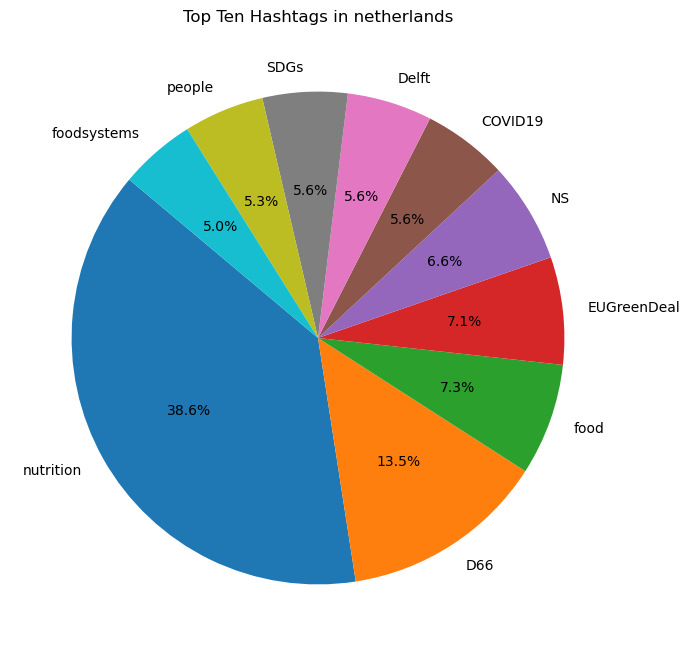

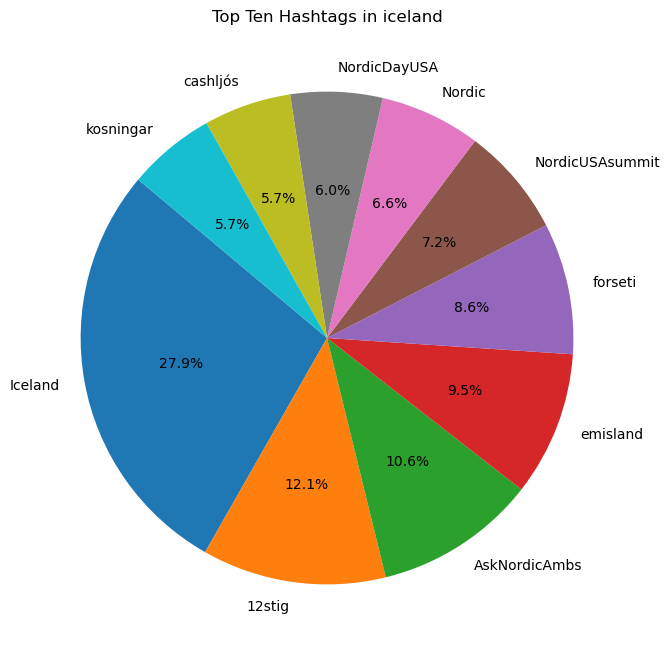

'Do you observe any patterns? What are the meanings\n/ interpretations of the hashtags you have identified? Write your findings in the report. (Add the\npie charts to the report.'

In [10]:
#Continuation of Sectionn A 

#b)

countries = training_df_1['country_user'].unique()

# Create a dictionary to store the top ten hashtags for each country
top_hashtags_by_country = {}

# Iterate over each country
for country in countries:
    # Filter DataFrame for the specific country
    country_df = training_df_1[training_df_1['country_user'] == country]

    # Combine all hashtags for the country into a single string
    all_hashtags = ' '.join(country_df['hashtags'].dropna())

    # Split the combined hashtags string into a list of individual hashtags
    all_hashtags_list = all_hashtags.split()

    # Use Counter to find the top ten hashtags
    top_hashtags = dict(Counter(all_hashtags_list).most_common(10))

    # Store the top ten hashtags in the dictionary
    top_hashtags_by_country[country] = top_hashtags

# Create pie charts for each country
for country, top_hashtags in top_hashtags_by_country.items():
    plt.figure(figsize=(8, 8))
    plt.pie(top_hashtags.values(), labels=top_hashtags.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f'Top Ten Hashtags in {country}')
    plt.show()

"""Do you observe any patterns? What are the meanings
/ interpretations of the hashtags you have identified? Write your findings in the report. (Add the
pie charts to the report."""
    


In [11]:
#C)

#Getting the total numbers of user from each political view 
pol_views = training_df_1.groupby(['country_user', 'pol_spec_user']).size().unstack(fill_value=0)

#normalizing the counts to get the percentages of each political view 
grouped_df_percentage = pol_views.div(pol_views.sum(axis=1), axis=0)

grouped_df_percentage.head() 



pol_spec_user,Center,Independent,Left,Right
country_user,,,,
belgium,0.206666,0.000000,0.338391,0.454943
denmark,0.259324,0.000000,0.411228,0.329448
iceland,0.000412,0.144919,0.582973,0.271697
ireland,0.167390,0.000000,0.424489,0.408122
netherlands,0.620151,0.000000,0.341769,0.038079


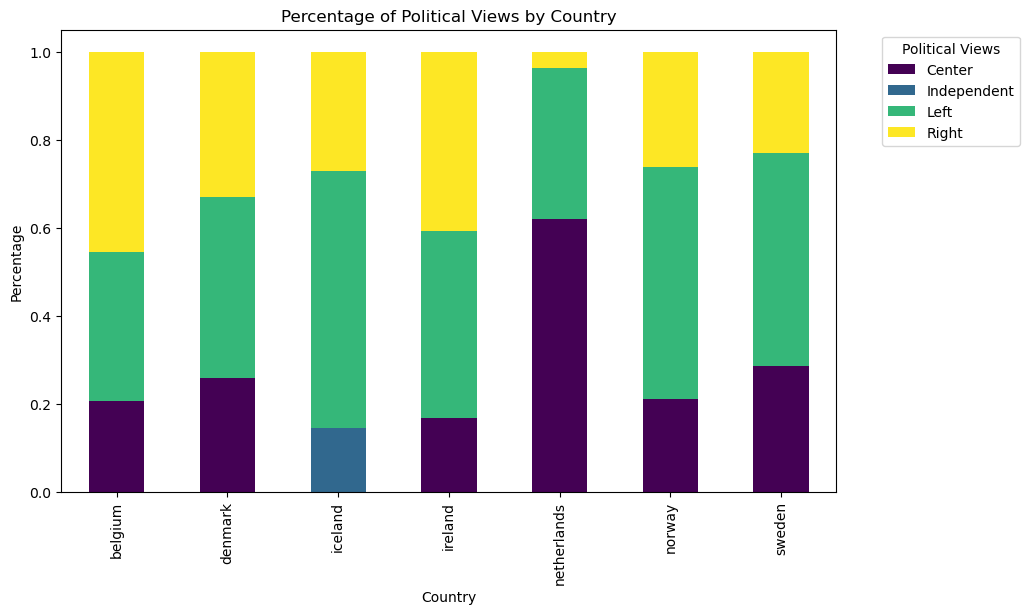

'Interpret your findings. Add your findings and the graphs to the report'

In [12]:
# Continuation of #C)

stacked_bar = grouped_df_percentage.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
# Set labels and title
stacked_bar.set_xlabel('Country')
stacked_bar.set_ylabel('Percentage')
stacked_bar.set_title('Percentage of Political Views by Country')

# Set legend
stacked_bar.legend(title='Political Views', labels=['Center', 'Independent', 'Left', 'Right'], bbox_to_anchor=(1.05, 1), loc ='upper left')

# Show the plot
plt.show()

"""Interpret your findings. Add your findings and the graphs to the report"""

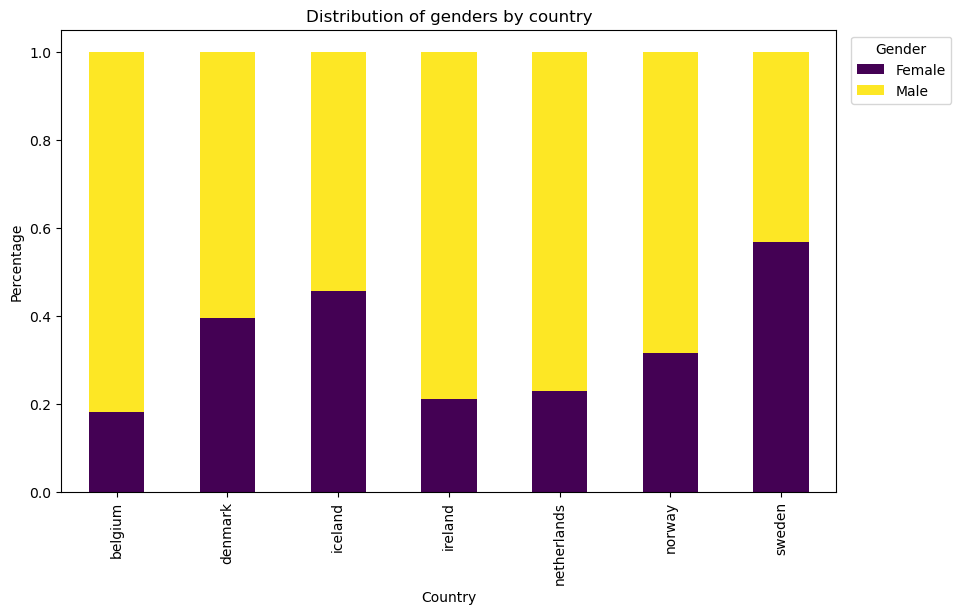

In [13]:
#d)
#grouping by country and gender 
gender_grouped = training_df_1.groupby(['country_user', 'gender_user']).size().unstack()

#stacking the gender for the plot 
gender_grouped = gender_grouped.div(gender_grouped.sum(axis= 1), axis = 0 )

#making the stacked bar plot 
stacked_gender = gender_grouped.plot(kind = 'bar', stacked = True, colormap = 'viridis',figsize = (10,6))
stacked_gender.set_title("Distribution of genders by country")
stacked_gender.set_ylabel("Percentage")
stacked_gender.set_xlabel("Country")
stacked_gender.legend(title = "Gender", bbox_to_anchor = (1.01,1), loc = "upper left")


# Show the plot
plt.show()

In [14]:
training_df_1.head(10)

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user
0,feminist AskMeAnything,: What does it mean to have a #feminist govern...,NaN,sweden,Male,Left
1,NaN,Jens Stoltenberg åpnet virtuelle Rockheim i da...,NaN,norway,Male,Left
2,NaN,Veel beterschap Bart en Loes! 🥰,BartDerwael,belgium,Male,Left
3,NaN,: Tydelige S aftryk: \n\nPskykiatrien styrkes\...,NaN,denmark,Female,Left
4,NaN,😃 https://t.co/bpqoZ8Y4wm,NaN,sweden,Male,Left
5,NaN,Idag togs första spadtaget i Kigali för Bionte...,NaN,sweden,Male,Left
6,NaN,": ""Alla ska kunna lita på sina läkemedel. Med ...",NaN,sweden,Female,Left
7,NaN,Jeg har tidligere været overrasket over det l...,listighjort,denmark,Female,Left
8,NaN,": Fem lärosäten, , får dela på 20 miljoner...",NaN,sweden,Female,Left
9,Cyprus,: ‘No timeframes’ but aim is to reach solution...,NaN,norway,Male,Left


In [6]:
#Section B 

#a)

#text cleaner fucntion
def text_cleaner(t): 
    # lower case
    t = t.lower()
    # remove hash
    t = re.sub(r'#\w+', '', t)
    # remove stop words
    w = t.split()
    w = [wo for wo in w if wo not in stopwords.words('english')]
    t = ' '.join(w)
    #delete words 3 or less chars
    words = t.split()
    filtered_words = [word for word in words if len(word) > 3]
    result_string = ' '.join(filtered_words)
    #remove words that start with http or \\
    pattern = r'\b(http|\\\\\w+)\S*\b'
    t = re.sub(pattern, '', t)
    # get rid of punctuation
    t = ''.join(char for char in t if char not in string.punctuation)
    #getting rid of emojis
    emoji_ranges = [
        (0x1F600, 0x1F64F),  # Emoticons
        (0x1F300, 0x1F5FF),  # Miscellaneous Symbols and Pictographs
        (0x1F680, 0x1F6FF),  # Transport and Map Symbols
        (0x1F700, 0x1F77F),  # Alchemical Symbols
        (0x1F780, 0x1F7FF),  # Geometric Shapes Extended
        (0x1F800, 0x1F8FF),  # Supplemental Arrows-C
        (0x1F900, 0x1F9FF),  # Supplemental Symbols and Pictographs
        (0x1FA00, 0x1FA6F),  # Chess Symbols
        (0x2600, 0x26FF),    # Miscellaneous Symbols
        (0x2700, 0x27BF),    # Dingbat Symbols
        ]
    t = ''.join(char for char in t if not any(start <= ord(char) <= end for start, end in emoji_ranges))
    return t





In [7]:


# lemmatizer method from lemmatizer.py
lemmatizer = WordNetLemmatizer()

##Tags the words in the tweets
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return(wordnet.ADJ)
    elif nltk_tag.startswith('V'):
        return(wordnet.VERB)
    elif nltk_tag.startswith('N'):
        return(wordnet.NOUN)
    elif nltk_tag.startswith('R'):
        return(wordnet.ADV)
    else:          
        return(None)

##Lemmatizes the words in tweets and returns the cleaned and lemmatized tweet
def lemmatize_tweet(tweet):
    #tokenize the tweet and find the POS tag for each token
    tweet = text_cleaner(tweet) #tweet_cleaner() will be the function you will write
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(tweet))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_tweet = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_tweet.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_tweet.append(lemmatizer.lemmatize(word, tag))
    return(" ".join(lemmatized_tweet))


training_df_1['text_clean'] = training_df_1['full_text'].apply(lemmatize_tweet)
test_df_1['text_clean'] = test_df_1['full_text'].apply(lemmatize_tweet)




In [17]:
training_df_1.head(5)

,hashtags,full_text,in_reply_to_screen_name,country_user,gender_user,pol_spec_user,text_clean
0,feminist AskMeAnything,: What does it mean to have a #feminist govern...,NaN,sweden,Male,Left,mean government join us 10 est friday 323 se…
1,NaN,Jens Stoltenberg åpnet virtuelle Rockheim i da...,NaN,norway,Male,Left,jens stoltenberg åpnet virtuelle rockheim dag ...
2,NaN,Veel beterschap Bart en Loes! 🥰,BartDerwael,belgium,Male,Left,veel beterschap bart en loes
3,NaN,: Tydelige S aftryk: \n\nPskykiatrien styrkes\...,NaN,denmark,Female,Left,tydelige aftryk pskykiatrien styrkes 110 co2 r...
4,NaN,😃 https://t.co/bpqoZ8Y4wm,NaN,sweden,Male,Left,


Loading dataset...
done in 0.000s.
Extracting tf-idf features for NMF...
done in 0.046s.
Extracting tf features for LDA...
done in 0.041s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.852s.


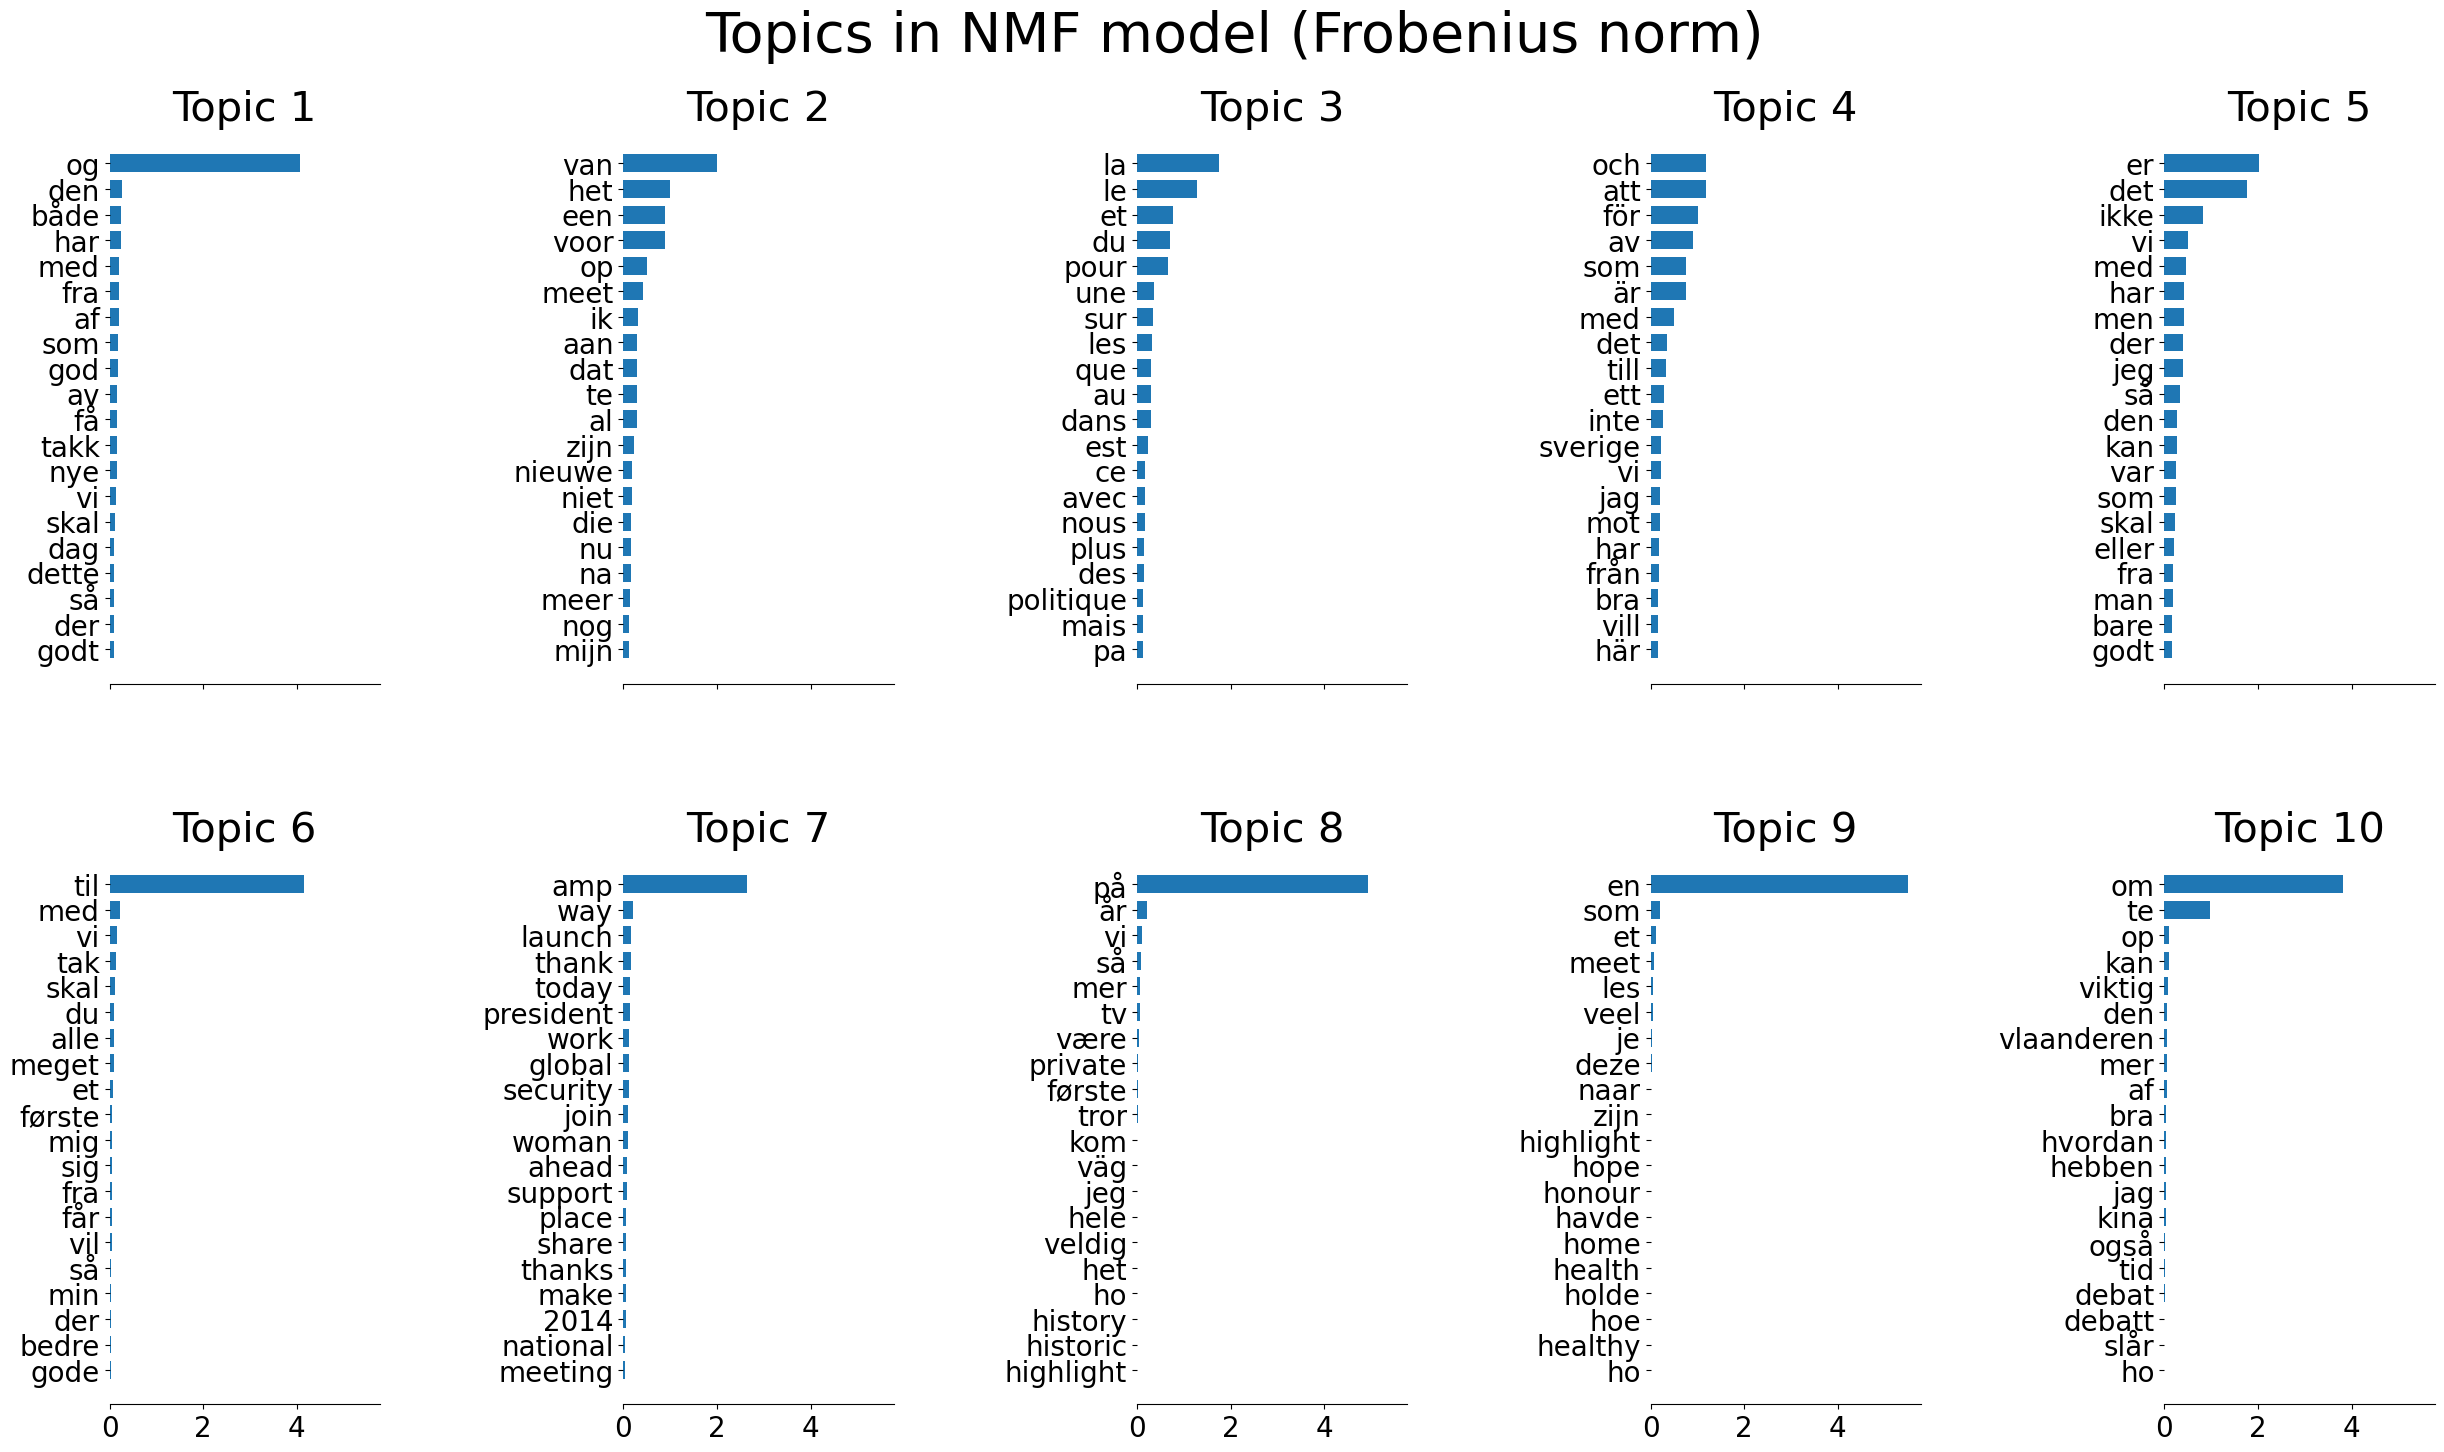



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.278s.


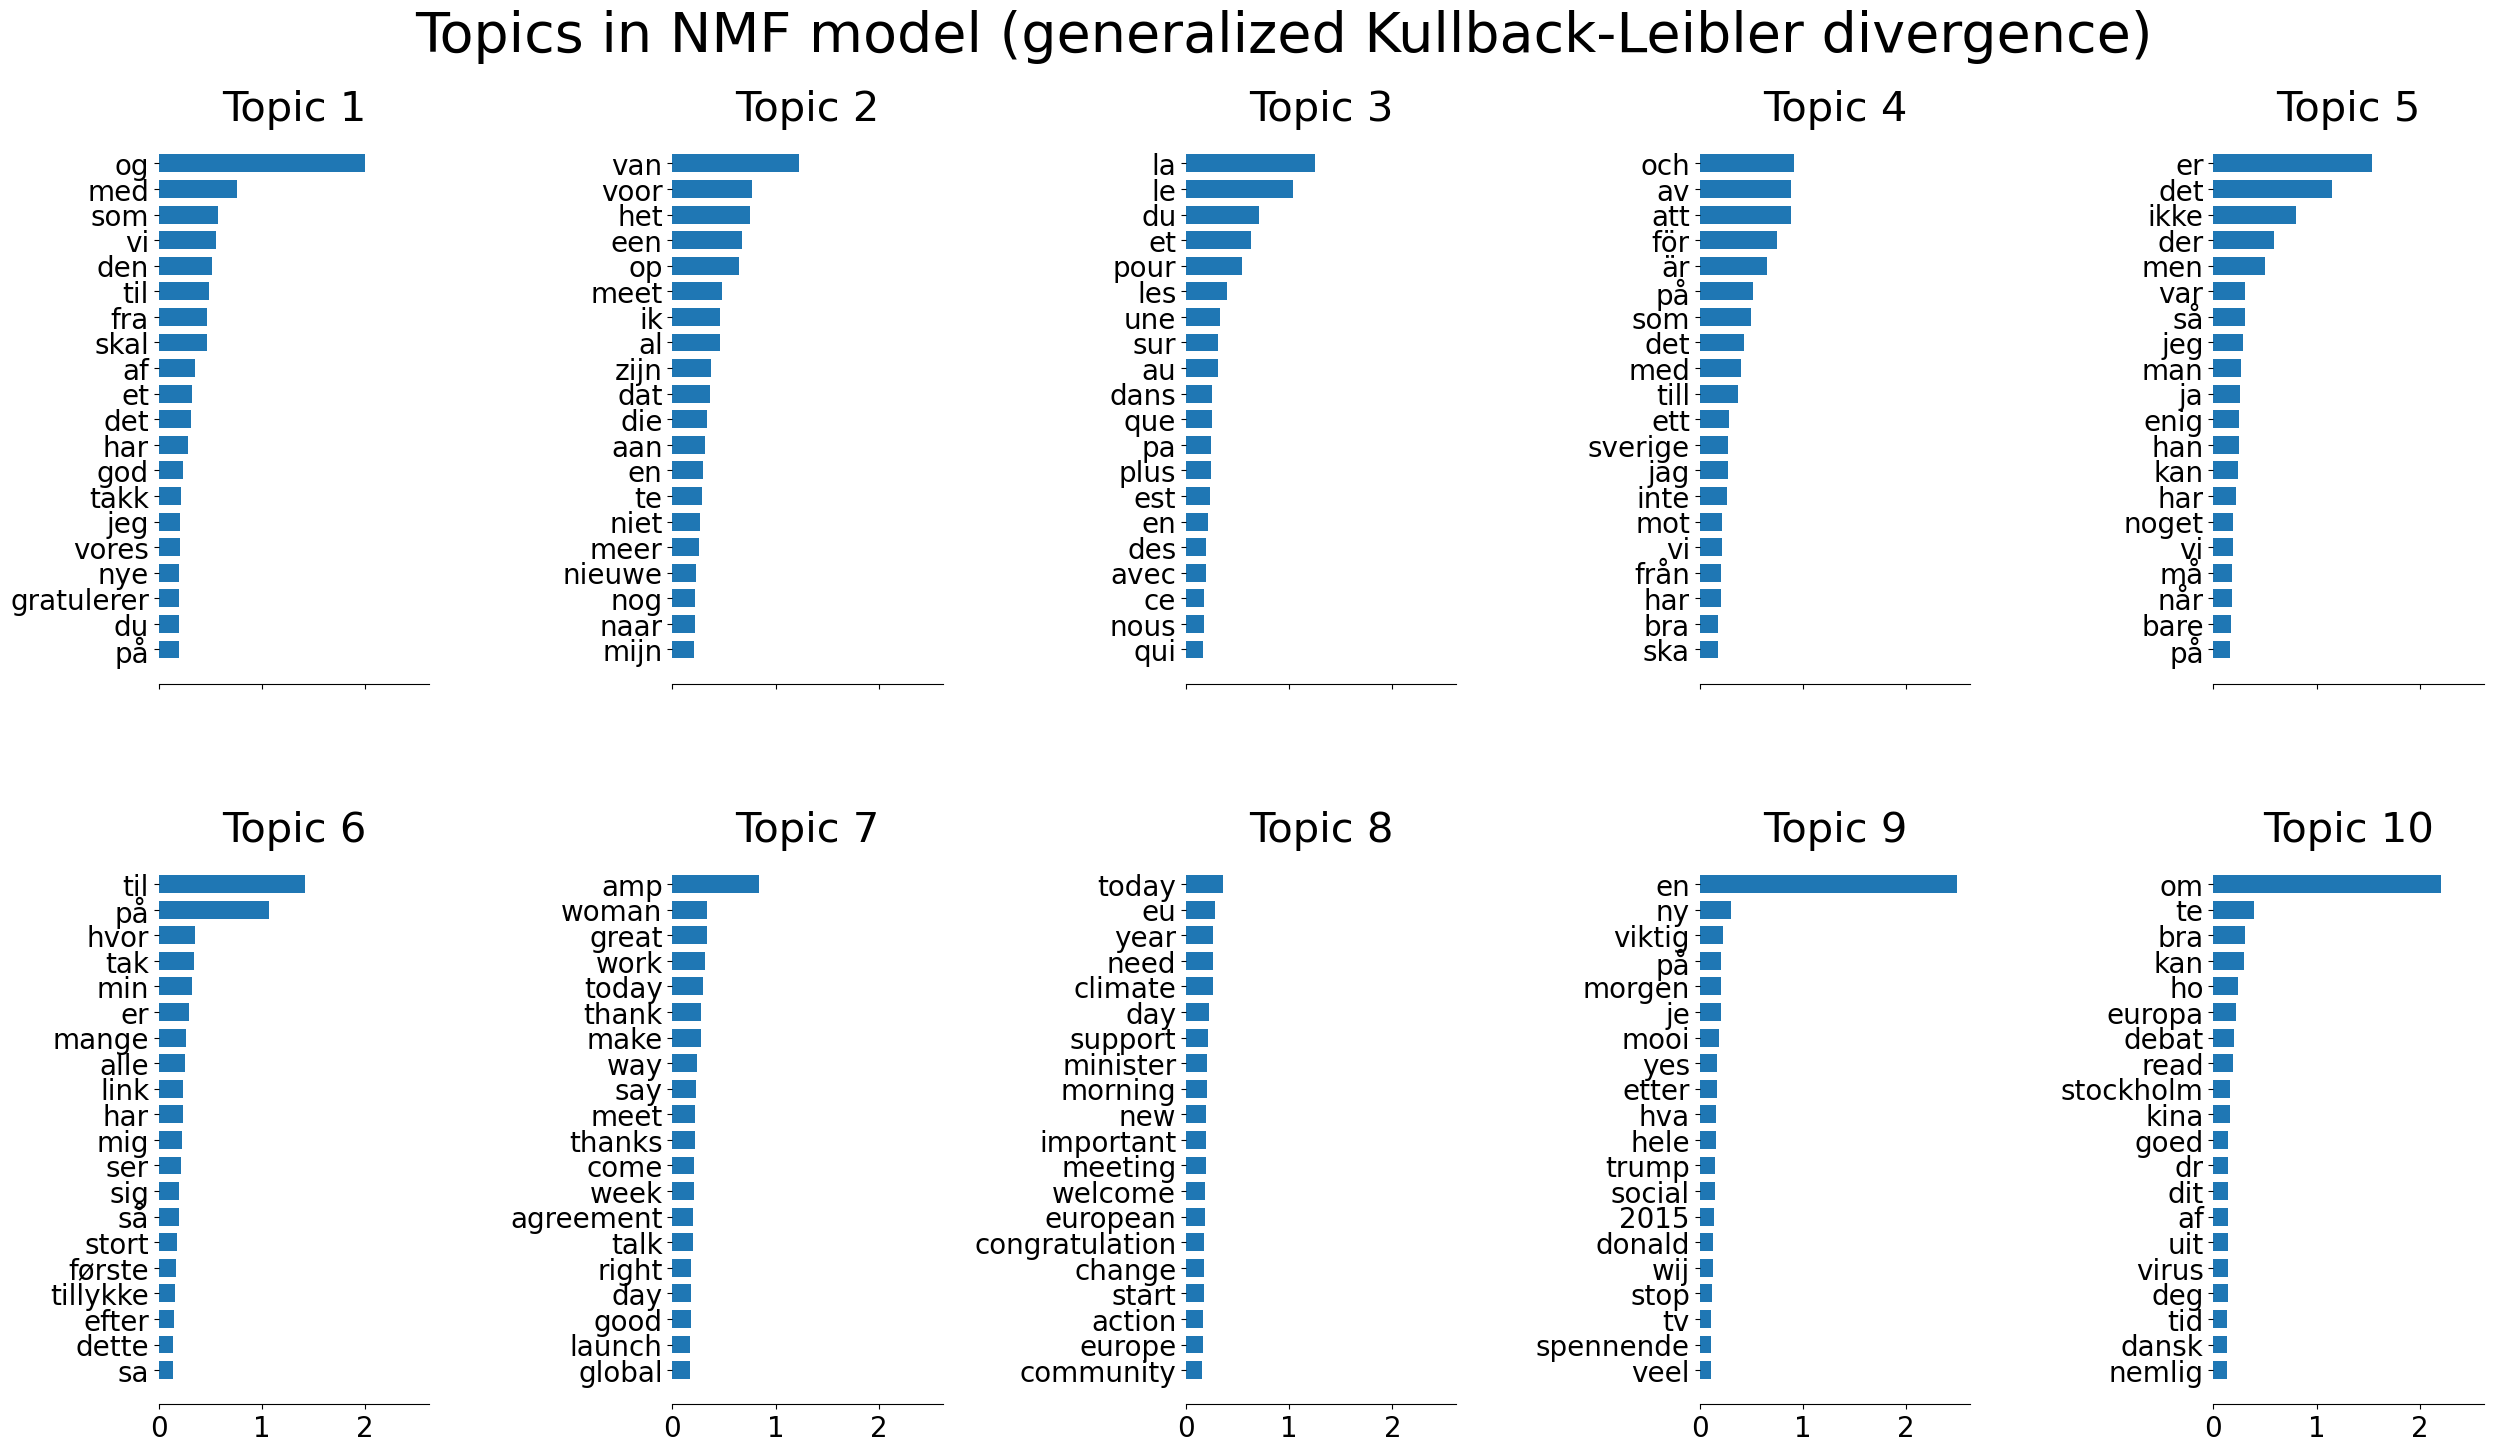



 Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.046s.


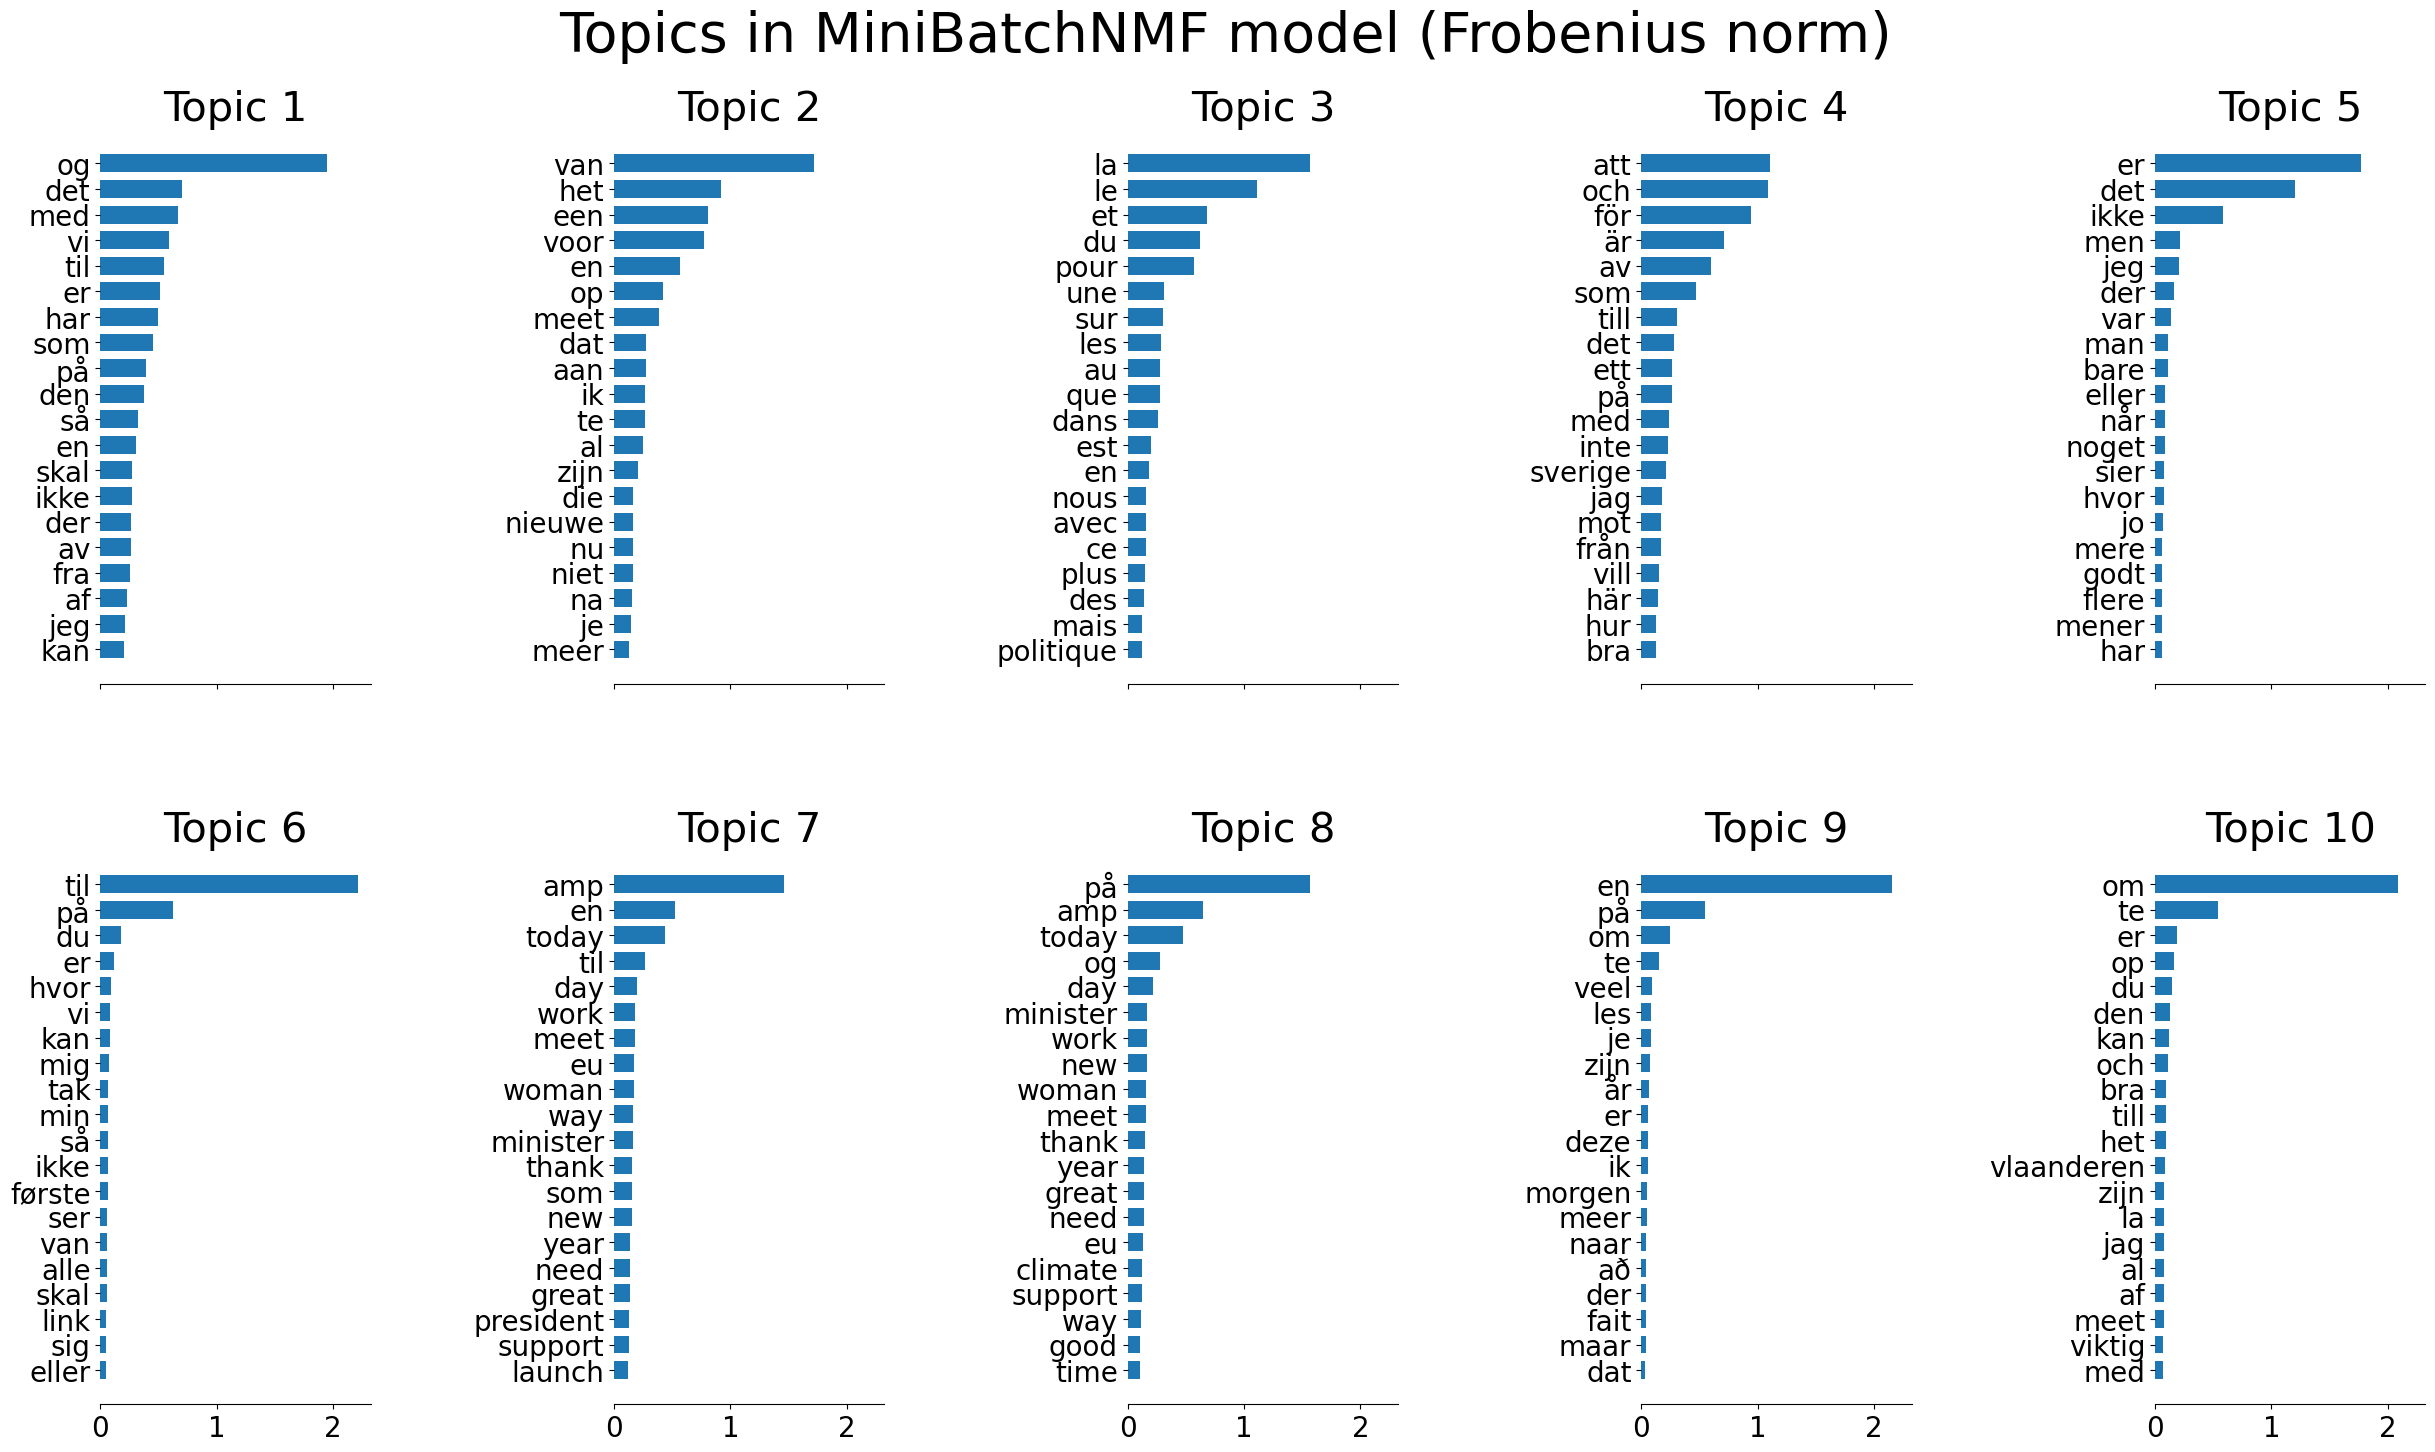



 Fitting the MiniBatchNMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000, batch_size=128...
done in 0.250s.


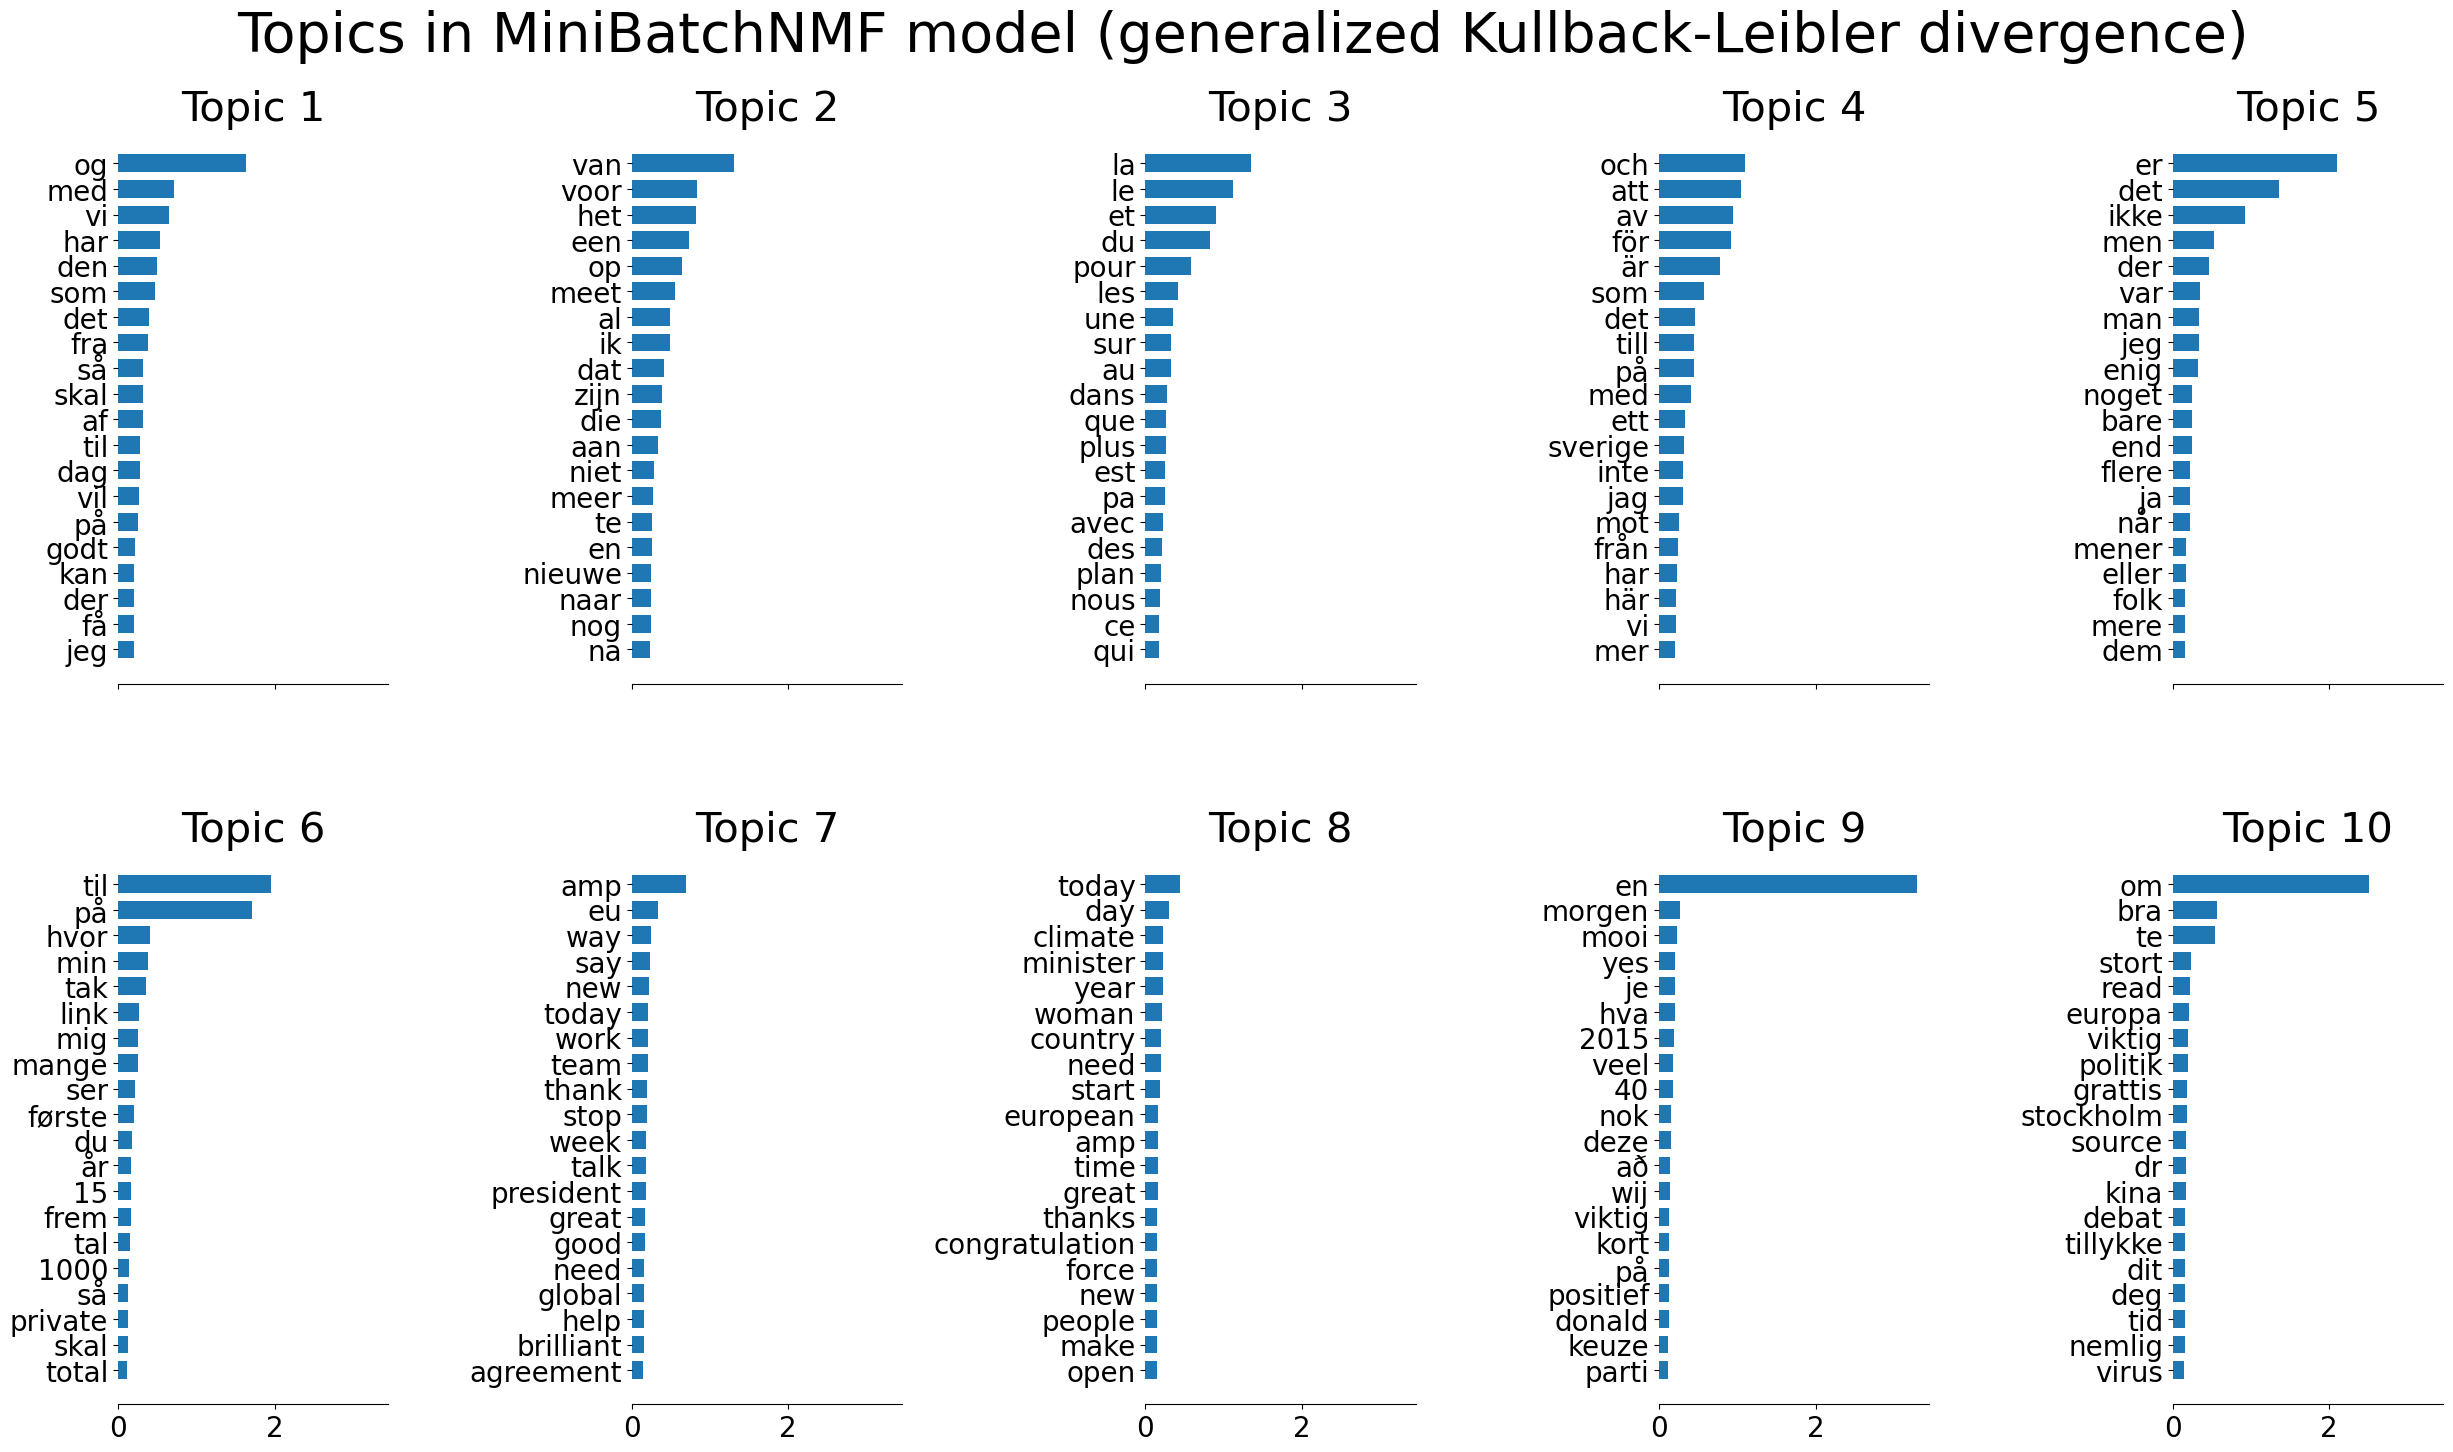



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 1.039s.


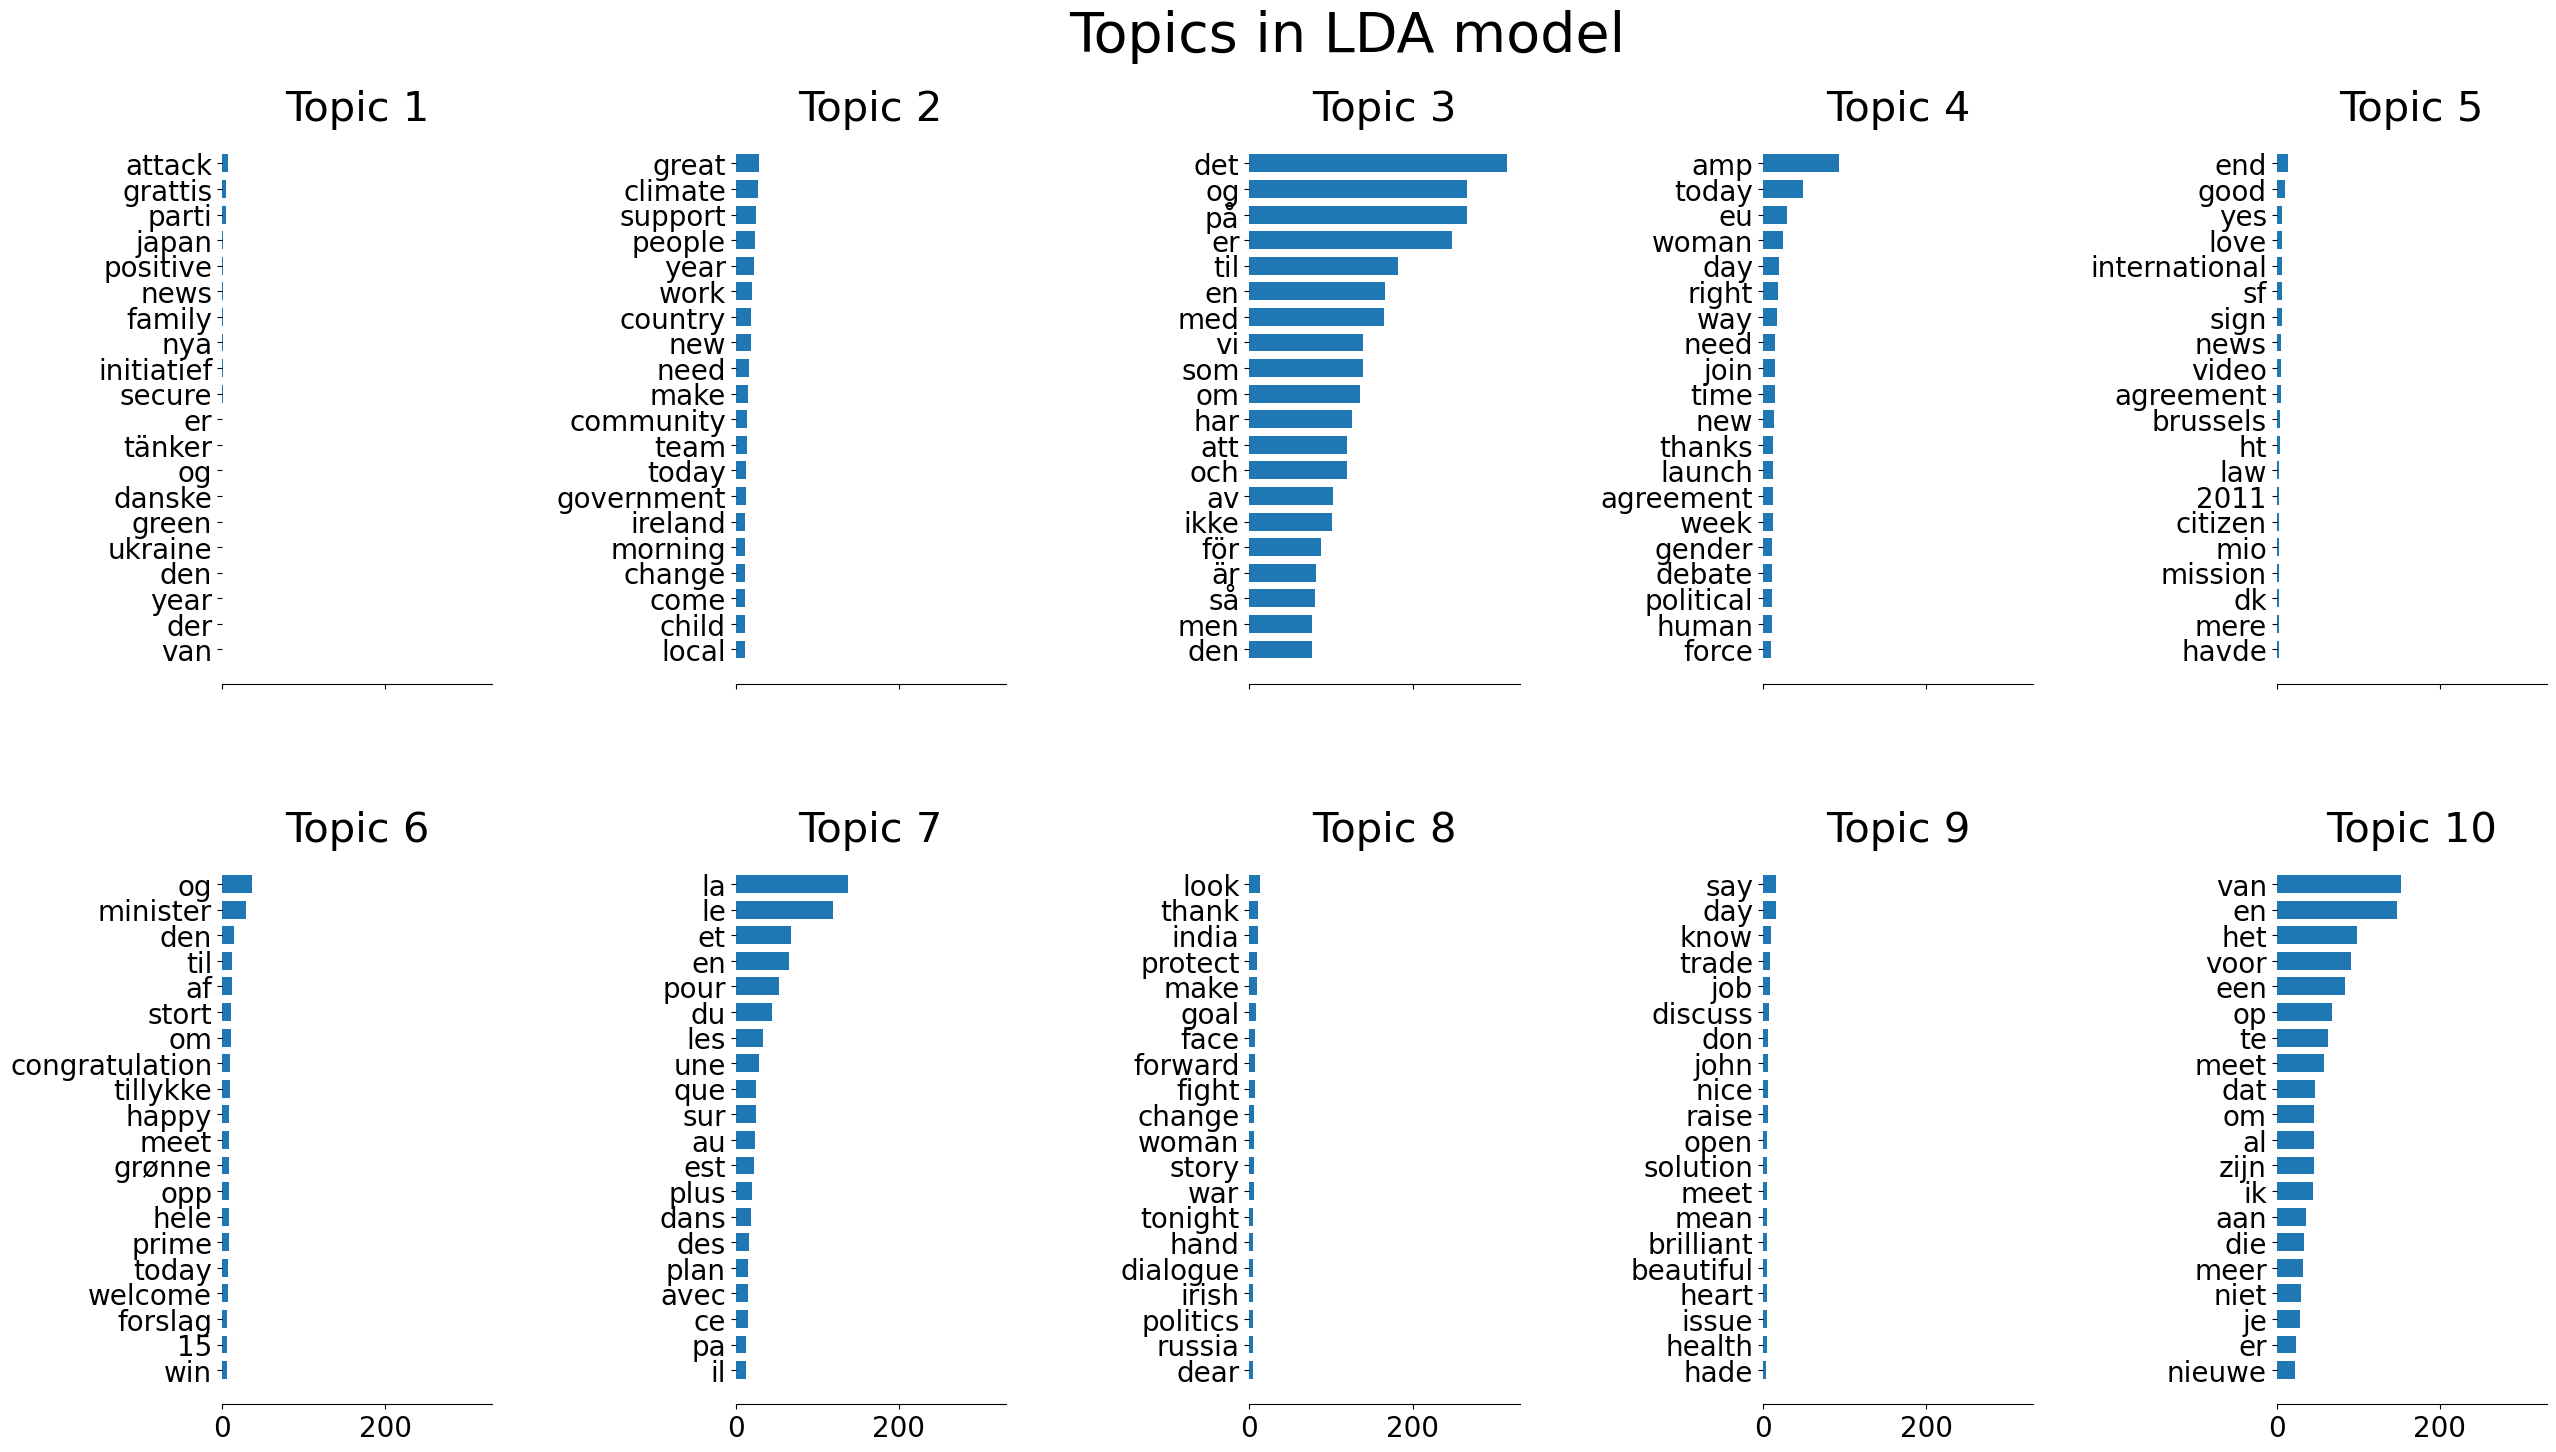

Adjust any parameters as you see fit. Analyze the results. Compare the results of both models. Interpret your findings and add your findings to the report


In [18]:
#Continuation of Section B

#b) (LDA and Non-negative Matrix Factorization)

from time import time

import matplotlib.pyplot as plt

from sklearn.decomposition import NMF, LatentDirichletAllocation, MiniBatchNMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[-n_top_words:]
        top_features = feature_names[top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data = training_df_1['text_clean']
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (Frobenius norm) with tf-idf "
    "features, n_samples=%d and n_features=%d, batch_size=%d..."
    % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (Frobenius norm)",
)

# Fit the MiniBatchNMF model
print(
    "\n" * 2,
    "Fitting the MiniBatchNMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d, "
    "batch_size=%d..." % (n_samples, n_features, batch_size),
)
t0 = time()
mbnmf = MiniBatchNMF(
    n_components=n_components,
    random_state=1,
    batch_size=batch_size,
    init=init,
    beta_loss="kullback-leibler",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    mbnmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in MiniBatchNMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")



print("Adjust any parameters as you see fit. Analyze the results. Compare the results of both models. \
Interpret your findings and add your findings to the report")

# Part II (Model) 

### Model: Random Forest 

In [17]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 93.4 MB/s eta 0:00:00:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install imbalanced-learn==0.8.1

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.7/189.7 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.11.0
    Uninstalling imbalanced-learn-0.11.0:
      Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install --upgrade imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Note: you may need to restart the kernel to use updated packages.


In [37]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#dropping nan from training dataset
training_df_1.dropna(subset=['text_clean'], inplace=True)

# Encoding the target variable 
label_encoder = LabelEncoder()

training_df_1['pol_spec_user_encoded'] = label_encoder.fit_transform(training_df_1['pol_spec_user'])

# Split the dataset into training and validation dataset 
X_train, X_val, y_train, y_val = train_test_split(training_df_1[["text_clean", "country_user", "gender_user"]],
                                                  training_df_1['pol_spec_user_encoded'],
                                                  test_size=0.2,
                                                  shuffle=True)



# Defining the column transformer to handle the text_clean for the test and unseen data later on
preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(use_idf=True), 'text_clean'),
        ('country', OneHotEncoder(), ['country_user']),
        ('gender', OneHotEncoder(), ['gender_user'])
    ],
    remainder='passthrough'
)


#preprocessing X_train with the preprocessor defined before 
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Define the rest of the pipeline
model_RF = RandomForestClassifier(n_estimators=120, random_state=42, n_jobs = -1)

# Fit the model on the oversampled data
model_RF.fit(X_train_preprocessed, y_train)

# Predictions on the original validation set
X_val_preprocessed = preprocessor.transform(X_val)
y_pred = model_RF.predict(X_val_preprocessed)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print(classification_report(y_val,y_pred))



Accuracy: 0.6100927005954939
Confusion Matrix:
[[ 8307     1  9464  3327]
 [    0    85    46    22]
 [ 2309    39 28662  3933]
 [ 1374    48 11193 12635]]
              precision    recall  f1-score   support

           0       0.69      0.39      0.50     21099
           1       0.49      0.56      0.52       153
           2       0.58      0.82      0.68     34943
           3       0.63      0.50      0.56     25250

    accuracy                           0.61     81445
   macro avg       0.60      0.57      0.57     81445
weighted avg       0.63      0.61      0.60     81445



In [53]:
# Using the model and preprocessor to transform and predict on new data (test_df_1)
X_test_preprocessed = preprocessor.transform(test_df_1)
y_pred_test = model_RF.predict(X_test_preprocessed)

print(y_pred_test)

[3 0 2 ... 2 2 3]


In [58]:
original_labels = label_encoder.inverse_transform(y_pred_test)

# Assuming you have an "Id" column in your original test_df_1 DataFrame
test_df_1['Id'] = range(len(test_df_1))

# Convert the NumPy array to a DataFrame
result_df = pd.DataFrame({'Id': test_df_1['Id'], 'pol_spec_user': original_labels})

# Save the DataFrame to a CSV file
result_df.to_csv("submission_RF_y_pred_1.csv", index=False, header = 1)

In [28]:
# JUst to explain how the RandomOverSampler works 
#used becasue category 1 ("Independent") was very low in quantity and had the lowest f1-score 

# Count the occurrences of each class
print("Before Oversampling:", Counter(y_train))

# Here, oversample the minority class (class 1)
oversample = RandomOverSampler(sampling_strategy='minority')

# apply oversampling
x_train_over_p, lab_train_over = oversample.fit_resample(X_train, y_train)

# Count the occurrences of each class after oversampling
print("After Oversampling:", Counter(lab_train_over))

#It works, equal representation of both classes after random oversampling of class 1


Before Oversampling: Counter({2: 139633, 3: 101849, 0: 83746, 1: 550})
After Oversampling: Counter({2: 139633, 1: 139633, 3: 101849, 0: 83746})


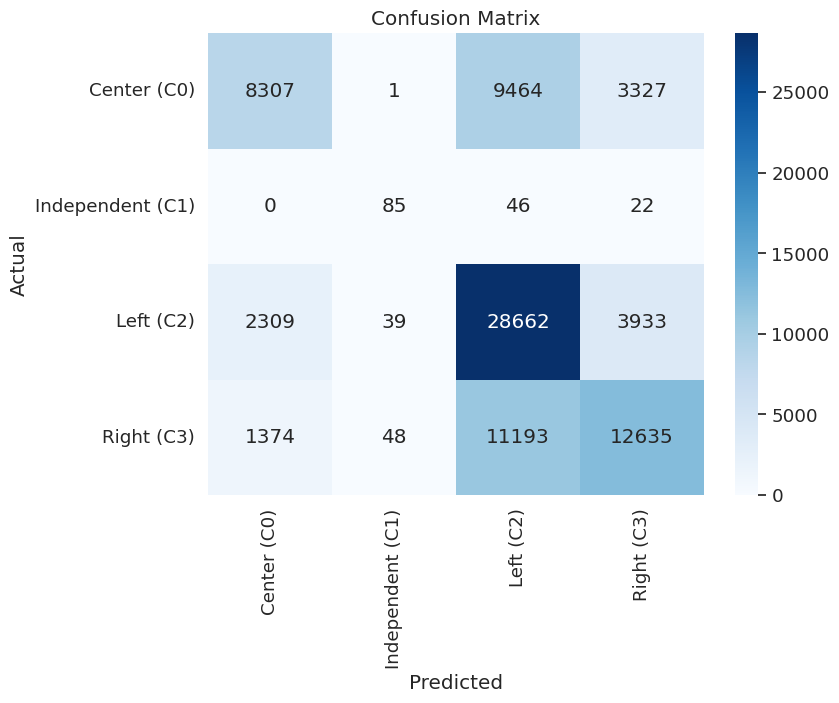

In [3]:
#Graping the confusion matrix from the model 

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#to avoid re-run the whole notebook becasue kernel died, 
#I will define the confusion matrix with the output above 
conf_matrix = [
    [8307, 1, 9464, 3327],
    [0, 85, 46, 22],
    [2309, 39, 28662, 3933],
    [1374, 48, 11193, 12635]
]

# Creating a Seaborn heatmap
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Center (C0)", "Independent (C1)", "Left (C2)", "Right (C3)"],
            yticklabels=["Center (C0)", "Independent (C1)", "Left (C2)", "Right (C3)"]) #if the kernel re-run can replace by xticklabels=original_labels to obtain same labels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()